# Week 13 Activities 




In [1]:
import pandas as pd

We will use *geopandas* in this notebook to create some maps. But first we need to make sure it is installed.

In [30]:
conda install geopandas --yes

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [10]:
# import geopandas
import geopandas as gpd

## Q: In Allegheny county, do bigger homes mean more dogs?


![Dog Analytics](https://media.giphy.com/media/mCRJDo24UvJMA/giphy.gif)

First step is identifying the the datasets. 


* [AC property assessment ](https://data.wprdc.org/dataset/property-assessments) 
* [AC dog license ](https://data.wprdc.org/dataset/allegheny-county-dog-licenses)


For each dataset, it is important to think about:
* What entities are represented in the data? What does each row represent?
* Is there any information shared across the two datasets?
* What information in the datasets can we use to answer our question?
    * What operation might we need to perform to get the information we need?


Look at the *Data Dictionary* for each dataset for information about the columns

[Property Data Dictionary](https://data.wprdc.org/dataset/property-assessments/resource/d31e1b1c-215d-4693-9898-154ca49050a4)

[Dog Data Dictionary](https://data.wprdc.org/dataset/allegheny-county-dog-licenses/resource/24771463-fec6-4d35-9662-2258575cd47d)

What entities are represented in the data? What does each row represent?

* **Property assessment** - Each row is a house in Allegheny county with 
* **Dogs** - Each row is a dog license

Is there any information shared across the two datasets?

* **Property assessment** - Zip code in the `OwnerZip` column
* **Dogs** - Zip code in the`PROPERTYZIP` column

What information in the datasets do we need to answer our question? Is there a column with that information

* **Property assessment** - Yes, the column `FINISHEDLIVINGAREA` contains the "Finished living area, as measured from the outside of the structure."
* **Dogs** - Each row is a dog license, but there isn't a specific column rather it is the datasets 

What operation might we need to perform to get the information we need?

* **Property assessment** - Each row is a house with size, so compute the mean by zip to get average house size per zip code
* **Dogs** - Each row is a dog license, so count the rows by Zip code to get dogs per zip code




## How do we Load the data into Python (with Pandas)

Both datasets have been downloaded from the WPRDC and placed in the `files` directory as `dogs.csv` and `properties.csv`


In [2]:
# load the properties file into a dataframe and make sure the zip codes are strings
properties = pd.read_csv("files/properties.csv.zip", compression="zip", dtype={'PROPERTYZIP': 'str'})
properties

/var/folders/v9/vyyhxg7x1w3ftnfc1c558ngw0000gn/T/ipykernel_16373/2860495325.py:2: DtypeWarning: Columns (19,20,29,30,38,46,57,83) have mixed types. Specify dtype option on import or set low_memory=False.
  properties = pd.read_csv("files/properties.csv.zip", compression="zip", dtype={'PROPERTYZIP': 'str'})


,PARID,PROPERTYHOUSENUM,PROPERTYFRACTION,PROPERTYADDRESS,PROPERTYCITY,PROPERTYSTATE,PROPERTYUNIT,PROPERTYZIP,MUNICODE,MUNIDESC,...,ASOFDATE,MUNICIPALITY,NEIGHBORHOOD,PGH_COUNCIL_DISTRICT,PGH_WARD,PGH_PUBLIC_WORKS_DIVISION,PGH_POLICE_ZONE,PGH_FIRE_ZONE,TRACT,BLOCK_GROUP
0,0001G00201000000,125.0,,1ST AVE,PITTSBURGH,PA,,15222,101,1st Ward - PITTSBURGH,...,2021-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0001G00203000000,0.0,,1ST AVE,PITTSBURGH,PA,,15222,101,1st Ward - PITTSBURGH,...,2021-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0001G00204000000,135.0,,1ST AVE,PITTSBURGH,PA,,15222,101,1st Ward - PITTSBURGH,...,2021-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0001D00153000000,501.0,,MARKET ST,PITTSBURGH,PA,,15222,101,1st Ward - PITTSBURGH,...,2021-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0001D00156000000,501.0,,MARKET ST,PITTSBURGH,PA,,15222,101,1st Ward - PITTSBURGH,...,2021-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581121,1658G00035000000,916.0,,PARK PLZ,WEXFORD,PA,,15090,935,Pine,...,2021-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
581122,1658H00022000000,933.0,,PARK PLZ,WEXFORD,PA,,15090,935,Pine,...,2021-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
581123,1500D00008000000,3035.0,,WEXFORD RD,WEXFORD,PA,,15090,935,Pine,...,2021-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
581124,1499F00028000000,190.0,,LIMERICK RD,WEXFORD,PA,,15090,935,Pine,...,2021-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# look at the column names and types
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581126 entries, 0 to 581125
Data columns (total 95 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   PARID                      581126 non-null  object 
 1   PROPERTYHOUSENUM           581120 non-null  float64
 2   PROPERTYFRACTION           581126 non-null  object 
 3   PROPERTYADDRESS            581126 non-null  object 
 4   PROPERTYCITY               581124 non-null  object 
 5   PROPERTYSTATE              581126 non-null  object 
 6   PROPERTYUNIT               581126 non-null  object 
 7   PROPERTYZIP                581125 non-null  object 
 8   MUNICODE                   581126 non-null  int64  
 9   MUNIDESC                   581126 non-null  object 
 10  SCHOOLCODE                 581126 non-null  int64  
 11  SCHOOLDESC                 581126 non-null  object 
 12  LEGAL1                     581105 non-null  object 
 13  LEGAL2                     51

In [4]:
# load the dog file into a dataframe and make sure the zip codes are strings
dogs = pd.read_csv("files/dogs.csv", dtype={'OwnerZip': 'str'})
dogs

,LicenseType,Breed,Color,DogName,OwnerZip,ExpYear,ValidDate
0,Dog Lifetime Spayed Female,LABRADOR RETRIEVER,YELLOW,SASHA,15137,2099,2005-01-31T00:00:00
1,Dog Lifetime Neutered Male,LABRADOR RETRIEVER,BROWN,JAKE,15129,2099,2004-06-21T00:00:00
2,Dog Lifetime Spayed Female,MIXED,SPOTTED,SHILOH,15129,2099,2006-01-20T00:00:00
3,Dog Lifetime Spayed Female,LAB MIX,BROWN,BLONDIE,15140,2099,2005-07-18T00:00:00
4,Dog Lifetime Spayed Female,AUS SHEPHERD,MULTI,SASHA,15238,2099,2004-02-25T00:00:00
...,...,...,...,...,...,...,...
34516,Dog Lifetime Spayed Female,LABRADOR RETRIEVER,YELLOW,LELA,15108,2099,2017-05-31T15:33:00
34517,Dog Lifetime Neutered Male,POMERANIAN MIX,BLACK,SPARTACUS,15108,2099,2017-05-31T15:08:42
34518,Dog Lifetime Male,GOLDENDOODLE,BROWN,PARKER,15025,2099,2017-05-31T15:33:00
34519,Dog Lifetime Spayed Female,MIXED,WHITE/BLACK,LILLY,15241,2099,2017-05-31T15:33:01


In [5]:
# look at the column names and types
dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34521 entries, 0 to 34520
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   LicenseType  34521 non-null  object
 1   Breed        34520 non-null  object
 2   Color        34501 non-null  object
 3   DogName      34521 non-null  object
 4   OwnerZip     34521 non-null  object
 5   ExpYear      34521 non-null  int64 
 6   ValidDate    34521 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.8+ MB


## What operation might we need to perform to get the information we need?

* **Property assessment** - Each row is a house with size, so compute the mean by zip to get average house size per zip code
* **Dogs** - Each row is a dog license, so count the rows by Zip code to get dogs per zip code




In [6]:
# Create a subset of the property data and drop the null values
properties_size_clean = properties[["PROPERTYZIP", "FINISHEDLIVINGAREA"]].dropna()
properties_size_clean

,PROPERTYZIP,FINISHEDLIVINGAREA
25,15222,1529.0
26,15222,1310.0
27,15222,877.0
28,15222,3140.0
29,15222,1399.0
...,...,...
581121,15090,2414.0
581122,15090,2436.0
581123,15090,1230.0
581124,15090,2664.0


In [7]:
# compute the average living area per zip code
avg_livingarea_per_zip = properties_size_clean.groupby("PROPERTYZIP").mean()
# rename the column to be less bad
avg_livingarea_per_zip = avg_livingarea_per_zip.rename(columns={"FINISHEDLIVINGAREA":"size"}, index={"PROPERTYZIP":"zip"})
# rename the index to be less bad
avg_livingarea_per_zip = avg_livingarea_per_zip.rename_axis(index={"PROPERTYZIP":"zip"})

avg_livingarea_per_zip['housecounts'] = properties_size_clean.groupby("PROPERTYZIP").count()

# display the 
avg_livingarea_per_zip

,size,housecounts
zip,,
15003,1418.588757,338
15005,2944.722222,324
15006,1284.822222,135
15007,1793.193548,124
15012,1657.000000,8
...,...,...
15668,2109.483871,31
16046,3079.413907,1208
16056,1716.333333,3


In [8]:
# create a subset of the dog data with just zip and name
just_dog_names = dogs[["OwnerZip", "DogName"]]
just_dog_names

,OwnerZip,DogName
0,15137,SASHA
1,15129,JAKE
2,15129,SHILOH
3,15140,BLONDIE
4,15238,SASHA
...,...,...
34516,15108,LELA
34517,15108,SPARTACUS
34518,15025,PARKER
34519,15241,LILLY


In [9]:
# Group by Zip code and then count the rows to get number of dogs per zip
dogs_per_zip = just_dog_names.groupby("OwnerZip").count()

dogs_per_zip = dogs_per_zip.rename(columns={"DogName":"dogs"})
dogs_per_zip = dogs_per_zip.rename_axis(index={"OwnerZip":"zip"})


dogs_per_zip

,dogs
zip,
15003,29
15005,47
15006,5
15007,9
15012,2
...,...
16342,1
32081,1
33426,1


## Can we visualize the dogs per zip?



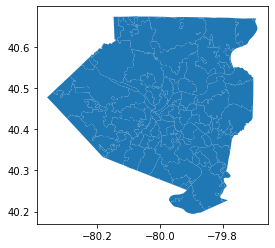

In [11]:
# read in a map of the zip code boundaries so we can viz zip codes
ac_map = gpd.read_file('files/ac-zip-code-boundaries.geojson')
ac_map.plot(); #adding semicolin to clean up output

In [12]:
# display the geodataframe
ac_map.head()

,OBJECTID,ZIP,NAME,ZIPTYPE,STATE,STATEFIPS,COUNTYFIPS,COUNTYNAME,S3DZIP,LAT,...,MFDU,SFDU,BOXCNT,BIZCNT,RELVER,COLOR,GlobalID,SHAPE.STArea(),SHAPE.STLength(),geometry
0,4,15007,BAKERSTOWN,NON-UNIQUE,PA,42,42003,ALLEGHENY,150,40.656688,...,0.0,107.0,66.0,55.0,1.9.3,10.0,{4768B869-6BC2-4B77-8DC7-A3BB678888D1},1.337121e+07,20129.308124,"POLYGON ((-79.92421 40.65181, -79.92422 40.651..."
1,5,15014,BRACKENRIDGE,NON-UNIQUE,PA,42,42003,ALLEGHENY,150,40.607964,...,59.0,1396.0,38.0,76.0,1.9.3,5.0,{D7938129-8427-49A4-8C6C-3A19848432D4},1.515338e+07,16855.546429,"POLYGON ((-79.73576 40.61129, -79.73574 40.611..."
2,6,15015,BRADFORD WOODS,NON-UNIQUE,PA,42,42003,ALLEGHENY,150,40.636452,...,0.0,430.0,95.0,56.0,1.9.3,10.0,{BABB5D5E-1FF4-4E03-BBAB-B84CBB5BFB31},2.658386e+07,34637.659348,"POLYGON ((-80.07258 40.64492, -80.07241 40.644..."
3,8,15018,BUENA VISTA,NON-UNIQUE,PA,42,42003,ALLEGHENY,150,40.289408,...,0.0,286.0,129.0,22.0,1.9.3,11.0,{4E2C2FAA-7976-4BEF-8119-BBB65C2F7014},6.087773e+07,76466.468736,"POLYGON ((-79.80552 40.24101, -79.80592 40.241..."
4,10,15020,BUNOLA,PO BOX,PA,42,42003,ALLEGHENY,150,40.219791,...,0.0,1.0,130.0,13.0,1.9.3,12.0,{6A1DF0B9-0732-465E-A020-6DBC3DCE93B3},5.373712e+07,51181.457073,"POLYGON ((-79.92674 40.24185, -79.92674 40.241..."


In [13]:
# Create a geodataframe with dog counts
dog_map = ac_map.merge(dogs_per_zip, left_on="ZIP", right_on="zip")

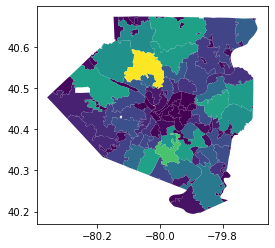

In [14]:
# display our dog counts per zip
dog_map.plot(column="dogs"); #adding semicolin to clean up output

### Redd up the chart

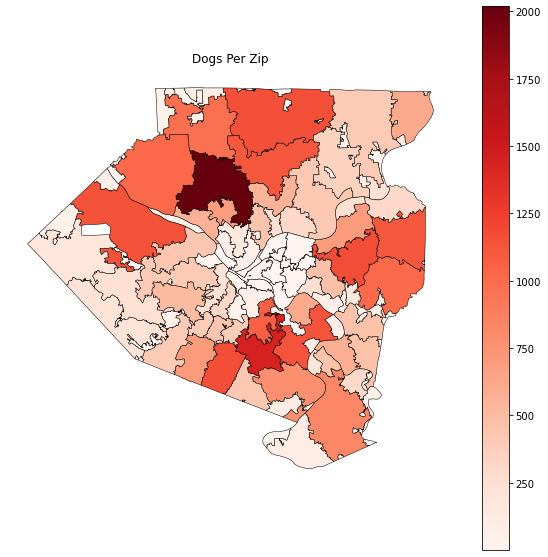

In [15]:
# Create a plot of the dogs column we added to our geodataframe above
ax = dog_map.plot(column="dogs", # use the dog data
                  cmap="Reds",  # use red as our color map
                  legend=True, # add a legend the easy way
                  figsize=(10,10), # make the figure bigger the easy way
                  linewidth=0.5, # add border lines 
                  edgecolor='black') # make the borderlines black

# use the axis object to set the title and turn off axes
ax.set_title("Dogs Per Zip")
ax.axis('off'); #adding semicolin to clean up output

## Can we visualize the average house size per zip?



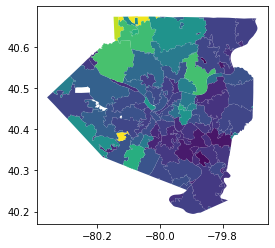

In [16]:
# create a geodataframe with average house size per zip
property_map = ac_map.merge(avg_livingarea_per_zip, left_on="ZIP", right_on="zip")
property_map.plot(column="size"); #adding semicolin to clean up output

### Redd up this chart

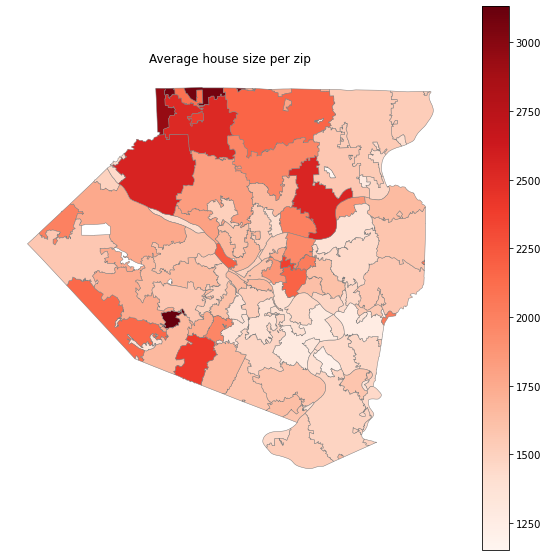

In [17]:
# Create a chloropleth plot of the house size
ax = property_map.plot(column="size", 
                       cmap="Reds", 
                       legend=True, 
                       figsize=(10,10),
                       linewidth=0.5, 
                       edgecolor='grey')

# use the axis object to set the title and turn off axes
ax.set_title("Average house size per zip")
ax.axis('off');  #adding semicolin to clean up output

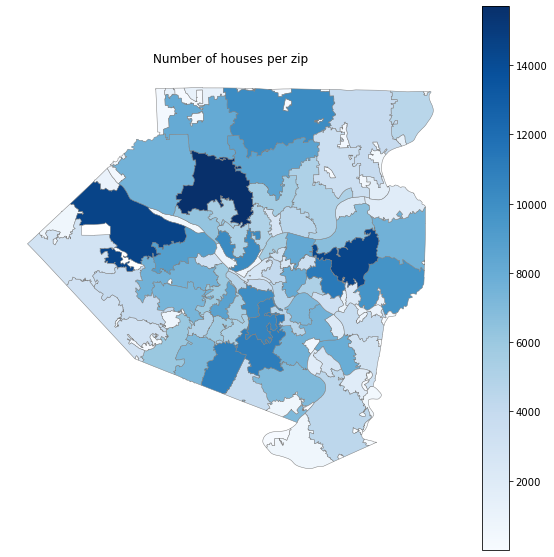

In [18]:
# Create a chloropleth plot of the number of houses per zip
ax = property_map.plot(column="housecounts", 
                       cmap="Blues", 
                       legend=True, 
                       figsize=(10,10),
                       linewidth=0.5, 
                       edgecolor='grey')

# use the axis object to set the title and turn off axes
ax.set_title("Number of houses per zip")
ax.axis('off');  #adding semicolin to clean up output

## Can we create a single dataframe with the dog counts and average house size?

In [19]:
# look at our home size data
avg_livingarea_per_zip

,size,housecounts
zip,,
15003,1418.588757,338
15005,2944.722222,324
15006,1284.822222,135
15007,1793.193548,124
15012,1657.000000,8
...,...,...
15668,2109.483871,31
16046,3079.413907,1208
16056,1716.333333,3


In [20]:
# look at our dog count data
dogs_per_zip

,dogs
zip,
15003,29
15005,47
15006,5
15007,9
15012,2
...,...
16342,1
32081,1
33426,1


In [21]:
# Combine them using the row index rather than column names
zip_dog_house_data = pd.merge(dogs_per_zip, avg_livingarea_per_zip, left_index=True, right_index=True)
zip_dog_house_data

,dogs,size,housecounts
zip,,,
15003,29,1418.588757,338
15005,47,2944.722222,324
15006,5,1284.822222,135
15007,9,1793.193548,124
15012,2,1657.000000,8
...,...,...,...
15642,6,1552.142857,49
15668,4,2109.483871,31
16046,91,3079.413907,1208


In [22]:
# normalize the data so we have dogs per house
zip_dog_house_data['dogs_per_house'] = zip_dog_house_data["dogs"] / zip_dog_house_data["housecounts"]
zip_dog_house_data

,dogs,size,housecounts,dogs_per_house
zip,,,,
15003,29,1418.588757,338,0.085799
15005,47,2944.722222,324,0.145062
15006,5,1284.822222,135,0.037037
15007,9,1793.193548,124,0.072581
15012,2,1657.000000,8,0.250000
...,...,...,...,...
15642,6,1552.142857,49,0.122449
15668,4,2109.483871,31,0.129032
16046,91,3079.413907,1208,0.075331


## Can we visualize the relationship between house size and number of dogs per zip code?

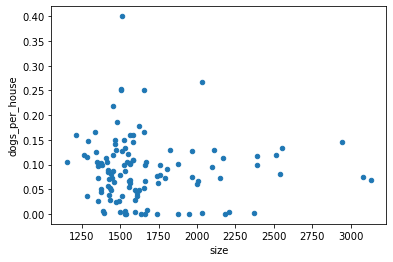

In [23]:
# make a scatter plot of the 
zip_dog_house_data.plot.scatter(x="size", # set x axis to house size
                                y="dogs_per_house"); # set y axis to dog count

## Redd up this chart


In [24]:
# import numpy for calculations
import numpy as np
# import the pyplot interface because we need it to draw the line and save the figure
import matplotlib.pyplot as plt
# use Nate Silver Style
plt.style.use("fivethirtyeight")

Let's add [best fit line too](https://www.kite.com/python/answers/how-to-plot-a-line-of-best-fit-in-python)! $y = mx + b$

In [25]:
# set x and y
x = zip_dog_house_data['size']
y = zip_dog_house_data['dogs_per_house']

# get the slope and intercept using the np.polyfit function
m, b = np.polyfit(zip_dog_house_data["size"], zip_dog_house_data["dogs_per_house"], 1)

# print out 
print(m)
print(b)

-8.35425967251214e-06
0.10337603177549722


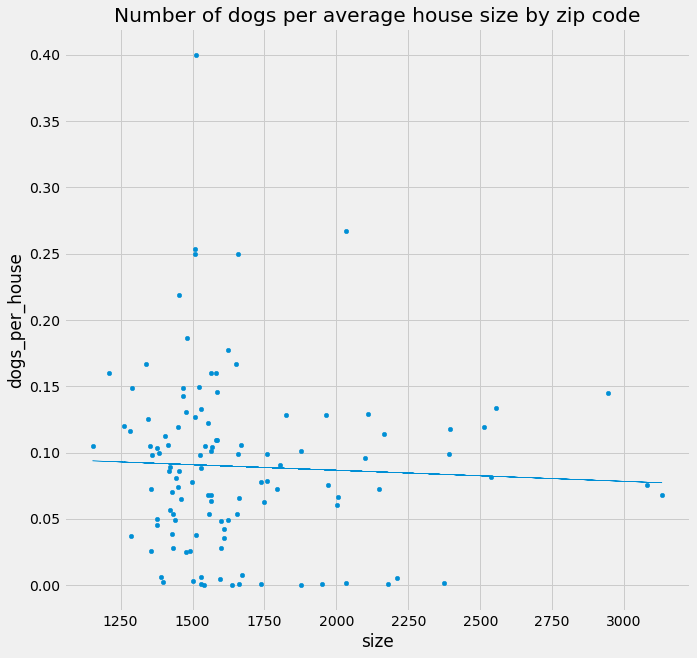

In [26]:
# generate a larger chart with a title
zip_dog_house_data.plot.scatter(x="size", # set x axis to house size 
                                y="dogs_per_house", # set y axis to dog count
                                figsize=(10,10), # make the chart bigger
                                title="Number of dogs per average house size by zip code"); # give the chart a title

# add the best fit line using the matplotlib pyplot interface
plt.plot(x, m*x + b, linewidth=0.5);

# save to a file
plt.savefig('dogs-per-house.png')

Interesting, the line seems to indicate that as house size goes up the number of dogs per house goes down.

![Dog House](https://media.giphy.com/media/l1L0gd8CAzvYC72gM/giphy.gif)

